C:\Users\sumit\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sumit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sumit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


Index(['-1.359807134', '-0.072781173', '2.536346738', '1.378155224',
       '-0.33832077', '0.462387778', '0.239598554', '0.098697901',
       '0.36378697', '0.090794172', '-0.551599533', '-0.617800856',
       '-0.991389847', '-0.311169354', '1.468176972', '-0.470400525',
       '0.207971242', '0.02579058', '0.40399296', '0.251412098',
       '-0.018306778', '0.277837576', '-0.11047391', '0.066928075',
       '0.128539358', '-0.189114844', '0.133558377', '-0.021053053', '149.62'],
      dtype='object')


C:\Users\sumit\anaconda3\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\sumit\anaconda3\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\sumit\anaconda3\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at y

[0]
Test_Accuracy: 100.000000


C:\Users\sumit\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


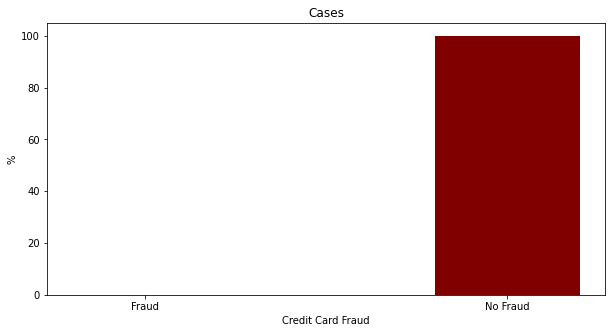

In [ ]:
import time
#from twilio.rest import Client
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
'''
account_sid = 'AC77e1604d0e580b692283ecb84072ee25'
auth_token = 'dfdbccace99266781db4757e9d72712a'
client = Client(account_sid, auth_token)

'''



while True:
    f=open('input1.txt','r')
    data=f.read()
    f.close()
    if data=='read':
        
        df=pd.read_csv('test/input.csv')
        print(df.columns)
        l=df.columns
        
        '''
        f=open('test/input.txt','r')
        data=f.read()
        f.close()
        l=data.split(',')
        
        print(l)
        print(len(l))
        l=[l]
        
        '''
        f1=open('BEST_Model.pkl','rb')
        model=pickle.load(f1)
        p=model.predict([l])
        print(p)
        new_prob = model.predict_proba([l])
        test_confidance = 100*np.max(new_prob)
        acc = "{:.0f}".format(test_confidance)
        accuracy = "{:2f}".format(test_confidance)
        print("Test_Accuracy:",accuracy)
        d={}
        
        
        f=open('output.txt','w')
        if str(p[0])=='1':
            f.write('Fraud')
            d['Fraud']=float(accuracy)
            d['No Fraud']=float(100-float(accuracy))
            #message = client.messages.create(body="Credit Card Fraud Transaction Detected",from_='+16205915989',to='+91'+str(mob))
            #print(message.sid)
        else:
            f.write('No Fraud')
            d['Fraud']=float(100-float(accuracy))
            d['No Fraud']=float(accuracy)
        fig = plt.figure(figsize = (10, 5))
        cases=d.keys()
        p=d.values()
        # creating the bar plot
        plt.bar(cases, p, color ='maroon',width = 0.4)

        plt.xlabel("Credit Card Fraud")
        plt.ylabel("%")
        plt.title("Cases")
        plt.show()
        f.close()
        f=open('input1.txt','w')
        f.write('')
        f.close()
        time.sleep(2)
        